# Question 1

In [180]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [181]:
#loading given data
sneakers_df = pd.read_csv('C:\\Users\\nikhi\\Downloads\\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
sneakers_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [182]:
#Finding average order value (or) mean of the order amount
print(sneakers_df['order_amount'].mean())

3145.128


We can clearly see that the Average Order Value is unusually high for a product such as sneakers.

a) what could be going wrong with our calculation?
- We havent considered the possiblity of Outlier(s) present in the given data
- There may be a records of bulk orders present in the given data, which would have shot-up the AOV value high.
- Or there maybe an error in recoding the data (human or technical error), which would have influenced the high AOV value.

Lets use describe() function to have a better view of the given data.

In [183]:
sneakers_df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can observe that the standard deviation value is very high which indicates the presence of outlier(s).

Lets polot boxplots to identify the outlier(s)

<AxesSubplot:>

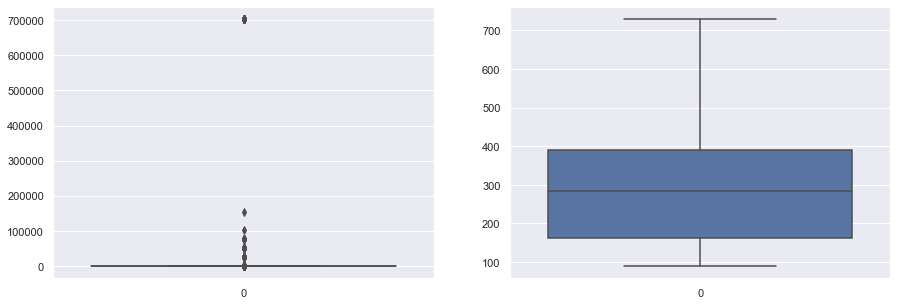

In [190]:
#Ploting boxplot for order_amount values
f, axes = plt.subplots(1, 2)
sns.boxplot(data=sneakers_df['order_amount'], ax=axes[0])
sns.boxplot(data=sneakers_df['order_amount'], ax=axes[1], showfliers=False)

<AxesSubplot:>

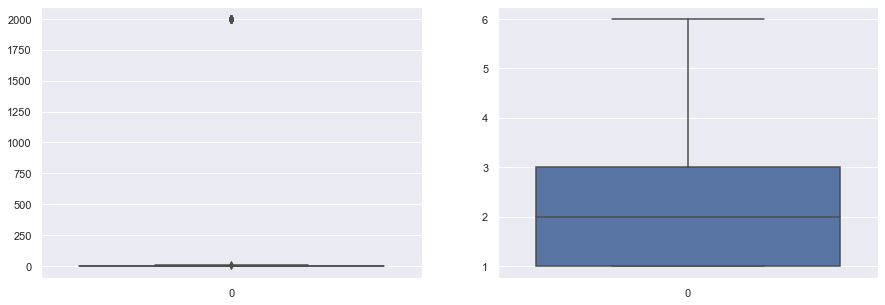

In [191]:
#Ploting boxplot for total_items values
f, axes = plt.subplots(1, 2)
sns.boxplot(data=sneakers_df['total_items'], ax=axes[0])
sns.boxplot(data=sneakers_df['total_items'], ax=axes[1], showfliers=False)

[(0.0, 10.0)]

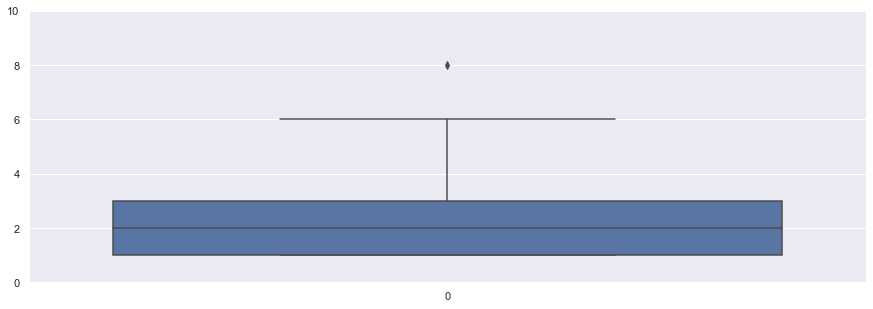

In [192]:
plt1 = sns.boxplot(data=sneakers_df['total_items'])
plt1.set(ylim=(0,10))

As per the plotted boxplot we can say that orders having total_items value above 6 can be considered as outliers and we can categorize these orders as bulk orders. 

In [193]:
#Seperated bulk orders from the dataframe and stored them in a new dataframe
bulkOrder_df = sneakers_df[sneakers_df.total_items > 6]
sneakers_df.drop(sneakers_df[sneakers_df.total_items > 6].index, inplace=True)

In [194]:
bulkOrder_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [195]:
#Finding average order value (or) mean of the order amount again 
print(sneakers_df['order_amount'].mean())

754.029706945002


We can see that the AOV is still high

Lets plot boxplot against order_amount to check if there are still any outlier(s) present

<AxesSubplot:>

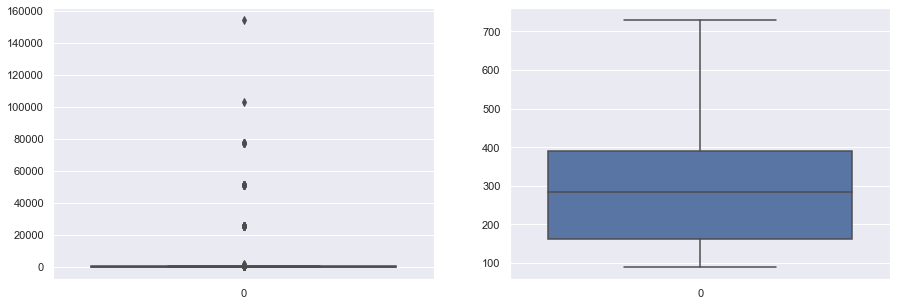

In [196]:
f, axes = plt.subplots(1, 2)
sns.boxplot(data=sneakers_df['order_amount'], ax=axes[0])
sns.boxplot(data=sneakers_df['order_amount'], ax=axes[1], showfliers=False)

In [197]:
#Sorting by order_amount value
sneakers_df.sort_values('order_amount',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
...,...,...,...,...,...,...,...
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
1,2,92,925,90,1,cash,2017-03-03 17:38:52
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


Lets find item price for these orders to effectively identify the outliers

In [198]:
#Dividing Total Order Amount by Total Number of Items gives the Price per Item value
sneakers_df['item_price']=sneakers_df['order_amount']/sneakers_df['total_items']
sneakers_df.sort_values('item_price',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12,25725.0
...,...,...,...,...,...,...,...,...
368,369,92,906,180,2,cash,2017-03-05 0:22:59,90.0
2714,2715,92,905,180,2,cash,2017-03-15 17:02:28,90.0
1927,1928,92,960,270,3,debit,2017-03-21 3:44:08,90.0
322,323,92,783,90,1,debit,2017-03-08 3:49:15,90.0


We can clearly see that there are multiple records where the price for a pair of sneakers (item_price) is very high. This is maybe due to an error in recoding the data or other technical error. Hence, these can be considered as outliers.

Lets plot boxplot against item_price to better identify the order records that can be considered as outliers

<AxesSubplot:>

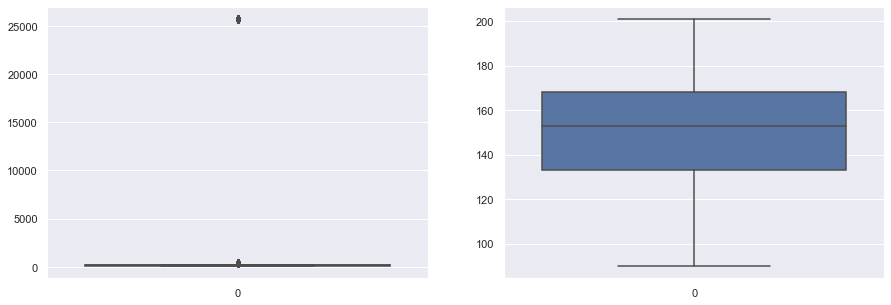

In [199]:
f, axes = plt.subplots(1, 2)
sns.boxplot(data=sneakers_df['item_price'], ax=axes[0])
sns.boxplot(data=sneakers_df['item_price'], ax=axes[1], showfliers=False)

[(0.0, 500.0)]

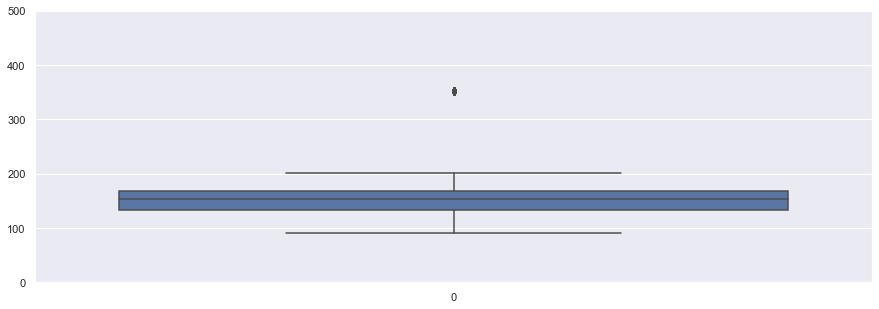

In [200]:
plt2 = sns.boxplot(data=sneakers_df['item_price'])
plt2.set(ylim=(0,500))

From above plots, we can consider the order records with the item_price greater than 250 to be classified as outliers.
Lets remove these outliers and then check for the AOV

In [201]:
#Dropping records with item_price > 250 (which we considered as outliers)
sneakers_df.drop(sneakers_df[sneakers_df.item_price > 250].index, inplace=True)

In [202]:
#Sorting the records aginst item_price (in decending order) and displaying them
sneakers_df.sort_values('item_price',ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
3601,3602,12,987,201,1,debit,2017-03-09 8:42:23,201.0
2228,2229,12,813,201,1,debit,2017-03-02 10:52:05,201.0
4900,4901,12,774,603,3,debit,2017-03-10 17:48:32,201.0
1194,1195,12,950,201,1,debit,2017-03-07 16:21:52,201.0
107,108,12,732,201,1,credit_card,2017-03-21 20:26:18,201.0
...,...,...,...,...,...,...,...,...
368,369,92,906,180,2,cash,2017-03-05 0:22:59,90.0
2912,2913,92,942,180,2,debit,2017-03-18 11:43:55,90.0
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01,90.0
2871,2872,92,854,180,2,cash,2017-03-09 19:25:11,90.0


b) & c) What metric would you report for this dataset and What is its value?
- We can report the Average Order Value of General orders (non-bulk orders)
- We can report the Average Order Value of Bulk orders
- We can report the Average number of Items ordered per order of General orders (non-bulk orders)
- We can report the Average number of Items ordered per order of Bulk orders

below are the values for them:

#### The Average Order Value for general orders (non-bulk orders) is $300.

In [203]:
#Finding the mean of order_amount or the Average Order Value (AOV)
print(sneakers_df['order_amount'].mean())

300.0


#### The Average Order Value for general orders (non-bulk orders) is $664948.

In [204]:
#Finding the mean of order_amount or the Average Order Value (AOV) for bulkOrders
print(bulkOrder_df['order_amount'].mean())

664948.0


#### The Average number of Items ordered per order of General orders (non-bulk orders) is 2.

In [205]:
print(round(sneakers_df['total_items'].mean()))

2


#### The Average number of Items ordered per order of Bulk orders is 1889.

In [206]:
print(round(bulkOrder_df['total_items'].mean()))

1889


### We could also aggregate the data by day and find per day metrics of Average Order Value and Average number of items ordered per order.